In [1]:
import pandas as pd
import tensorflow as tf
import sys

In [2]:
from meta.paths import PATH_TO_DATA, PATH_TO_IMAGE_PAIRS, PATH_TO_TRAIN
from preprocessing.data_generator import CustomGen
from text.title_similarity import calculate_title_similarities
from viz.image_printers import print_image_matrices, print_image_pair

# Import Training Data

In [3]:
train_df = pd.read_csv(PATH_TO_IMAGE_PAIRS)
train_df.head()

,class_label,source_image,target_image,type
0,1.0,a90d4221dc76c0826afc4f0ab9db9e7e.jpg,a90d4221dc76c0826afc4f0ab9db9e7e.jpg,RELATED
1,1.0,a90d4221dc76c0826afc4f0ab9db9e7e.jpg,14c1526cc0d81d7b3c9d2c4b287517dd.jpg,RELATED
2,1.0,a90d4221dc76c0826afc4f0ab9db9e7e.jpg,9d9e84cc7c789ede9a75b7280f0c0c91.jpg,RELATED
3,1.0,a90d4221dc76c0826afc4f0ab9db9e7e.jpg,928611eab7042478e6e54554ca5bfe34.jpg,RELATED
4,1.0,79351534d08f924b0ed3493131ce160d.jpg,79351534d08f924b0ed3493131ce160d.jpg,RELATED


# Test Generator

In [4]:
data_generator = CustomGen(train_df)

Found 82698 validated image filenames belonging to 2 classes.
Found 82698 validated image filenames belonging to 2 classes.


1.0


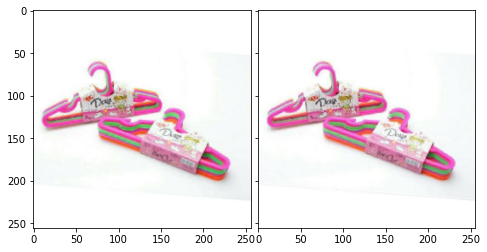

In [5]:
target_index = 1
batch_index = 300
source_images, target_images, class_labels = data_generator[batch_index]
print(class_labels[target_index])
print_image_matrices((source_images[target_index], target_images[target_index]))

1.0


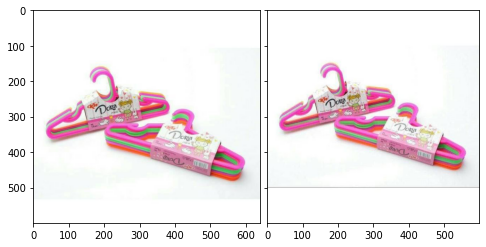

In [6]:
entry = train_df.iloc[batch_index * 32 + target_index]
print(entry['class_label'])
print_image_pair((entry["source_image"], entry["target_image"]))

# How to Use Generator

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from random import randrange
from viz.image_printers import print_image_type, print_titles

data_generator = CustomGen(train_df) # Step 1. initialize it

Found 82698 validated image filenames belonging to 2 classes.
Found 82698 validated image filenames belonging to 2 classes.


## Related Products

Label: 1.0


('Karpet Refleksi DATAR Alat Pijat alas Kaki Foot Refleksi Akupuntur Matras',
 'Karpet Terapi Kesehatan Kaki Dan Tangan / Matras Refleksi Kesehatan')

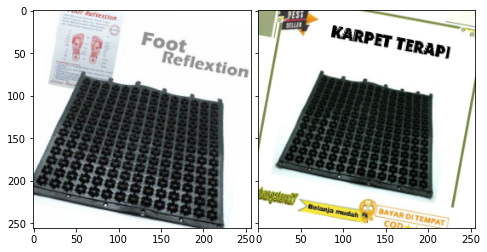

In [8]:
related_indices = print_image_type(train_df, data_generator, "RELATED")
print_titles(train_df, related_indices)

## Unrelated but Similar Products

Label: 0.0


('Sweety bronze pants S36/M34/L30/Xl26',
 'Goon Smile Baby Night Pants M34 / L30 / XL26')

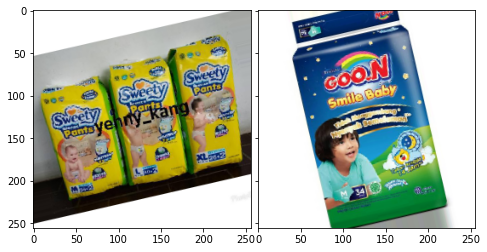

In [10]:
unrelated_similar_indices = print_image_type(train_df, data_generator, "UNRELATED_SIMILAR")
print_titles(train_df, unrelated_similar_indices)

## Unrelateted and Distinct Products

Label: 0.0


('Everwhite Blush Cream (3 in 1)',
 '[SHARE IN BOTTLE] Avoskin Miraculous Refining Toner & Serum')

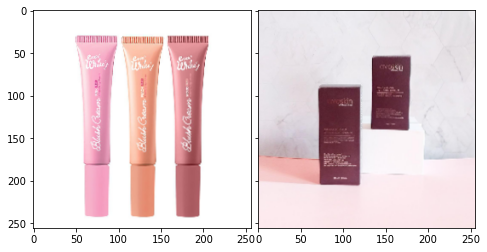

In [11]:
unrelated_notsimilar_indices = print_image_type(train_df, data_generator, "UNRELATED_NOTSIMILAR")
print_titles(train_df, unrelated_notsimilar_indices)